# Project Description
This project is focused on the Prediction of Concrete compressive strength(MPa, megapascals) based different commonents
The dependent Variable is Concrete compressive strength(MPa, megapascals), while the independent variables are:
1) Cement (component 1)(kg in a m^3 mixture)

2) Blast Furnace Slag (component 2)(kg in a m^3 mixture)	
3) Fly Ash (component 3)(kg in a m^3) 

4) Water (component 4)(kg in a m^3 mixture)	
5) Superplasticizer (component 5)(kg in a m^3 mixture)	
6) Coarse Aggregate (component 6)(kg in a m^3 mixture)	
7) Fine Aggregate (component 7)(kg in a m^3 mixture)	

Different LightGBM models will be developed based on different age of curing.


# Import Important Libraries

In [202]:
import pandas as pd
import fast_ml
from sklearn.preprocessing  import OneHotEncoder
from fast_ml import eda
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import hydroeval as he
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from fast_ml.model_development import train_valid_test_split
%matplotlib inline
from lightgbm import LGBMRegressor as lgbm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rf

# Data Preparation and Assessment

In [203]:
#Load and View Data
filepath='Concrete_Data.xlsx'
df=pd.read_excel(filepath,engine='openpyxl') #without engine='openpyxl', I was unable to read the excel file) 
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [204]:
from fast_ml import eda

# One of the most useful dataframe summary view
summary_df = eda.df_info(df)
summary_df

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Cement,float64,Numerical,280,"[540.0, 332.5, 198.6, 266.0, 380.0, 475.0, 427...",0,0.0
Blast Furnace Slag,float64,Numerical,187,"[0.0, 142.5, 132.4, 114.0, 95.0, 47.5, 190.0, ...",0,0.0
Fly Ash,float64,Numerical,163,"[0.0, 96.67, 94.58, 100.52, 125.4, 121.62, 118...",0,0.0
Water,float64,Numerical,205,"[162.0, 228.0, 192.0, 146.0, 170.1, 175.5, 153...",0,0.0
Superplasticizer,float64,Numerical,155,"[2.5, 0.0, 10.1, 8.6, 16.5, 18.6, 23.4, 8.9, 3...",0,0.0
Coarse Aggregate,float64,Numerical,284,"[1040.0, 1055.0, 932.0, 978.4, 1047.0, 971.0, ...",0,0.0
Fine Aggregate,float64,Numerical,304,"[676.0, 594.0, 825.5, 670.0, 806.9, 850.6, 800...",0,0.0
Age (day),int64,Numerical,14,"[28, 270, 365, 360, 90, 180, 3, 7, 56, 91]",0,0.0
Concrete Compressive Strength,float64,Numerical,938,"[79.98611076, 61.887365759999994, 40.269535256...",0,0.0


In [205]:
#simple Descriptive Statistics of Data
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete Compressive Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225



Correlation matrix:
                                Cement   Blast Furnace Slag   Fly Ash   \
Cement                         1.000000            -0.275193 -0.397475   
Blast Furnace Slag            -0.275193             1.000000 -0.323569   
Fly Ash                       -0.397475            -0.323569  1.000000   
Water                         -0.081544             0.107286 -0.257044   
Superplasticizer               0.092771             0.043376  0.377340   
Coarse Aggregate              -0.109356            -0.283998 -0.009977   
Fine Aggregate                -0.222720            -0.281593  0.079076   
Age (day)                      0.081947            -0.044246 -0.154370   
Concrete Compressive Strength  0.497833             0.134824 -0.105753   

                                Water    Superplasticizer   \
Cement                        -0.081544           0.092771   
Blast Furnace Slag             0.107286           0.043376   
Fly Ash                       -0.257044           0.

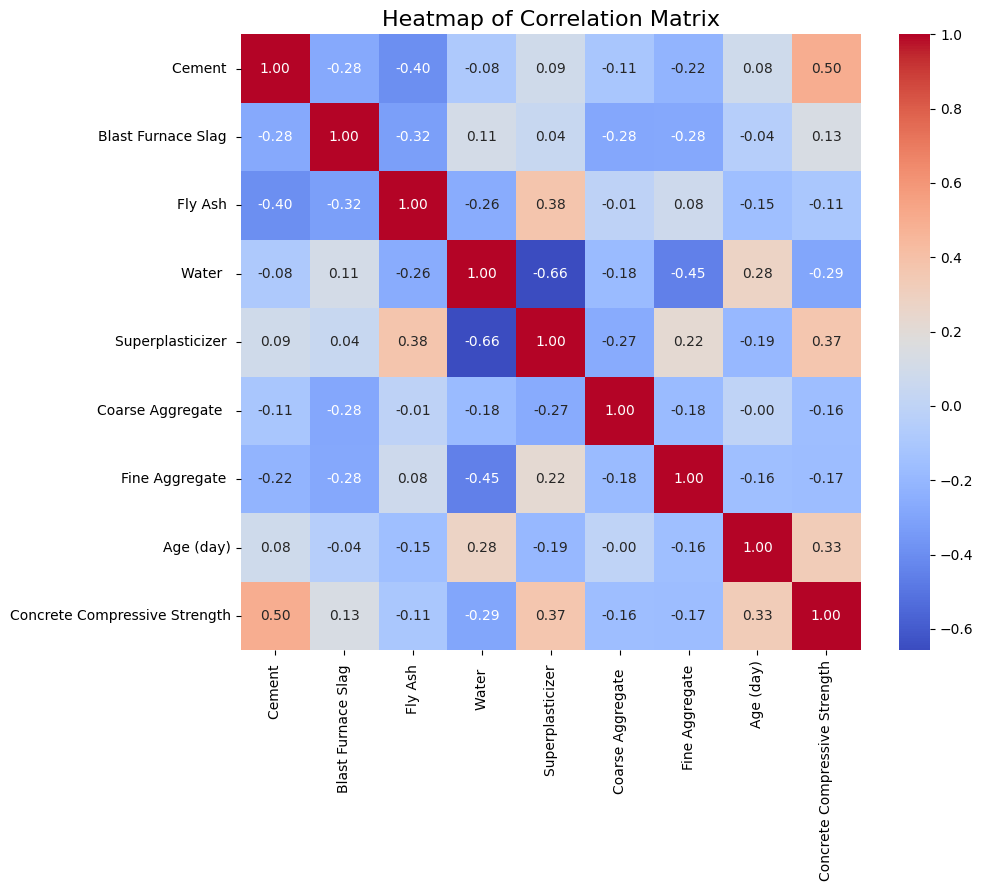

In [206]:
corr = df.corr()
print("\nCorrelation matrix:")
print(corr)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()


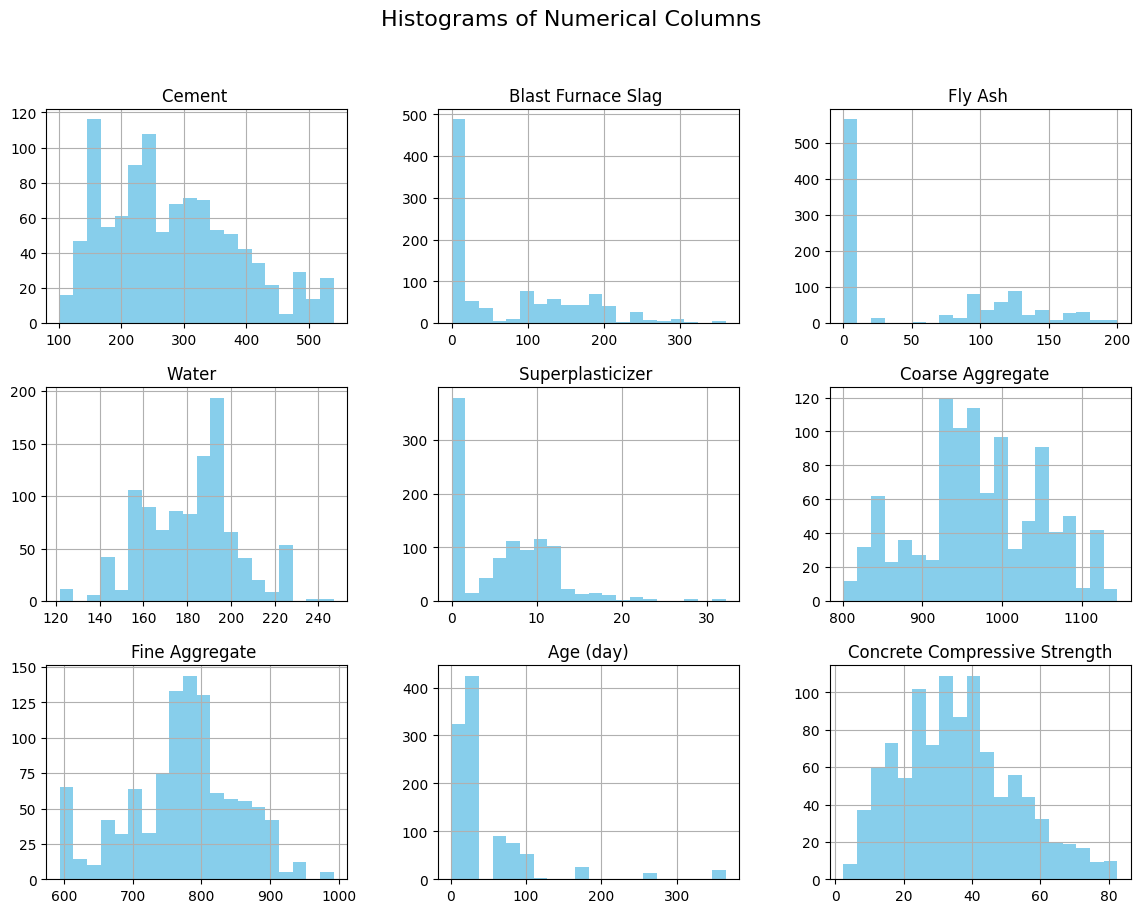

In [250]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


## Exploratory Analysis

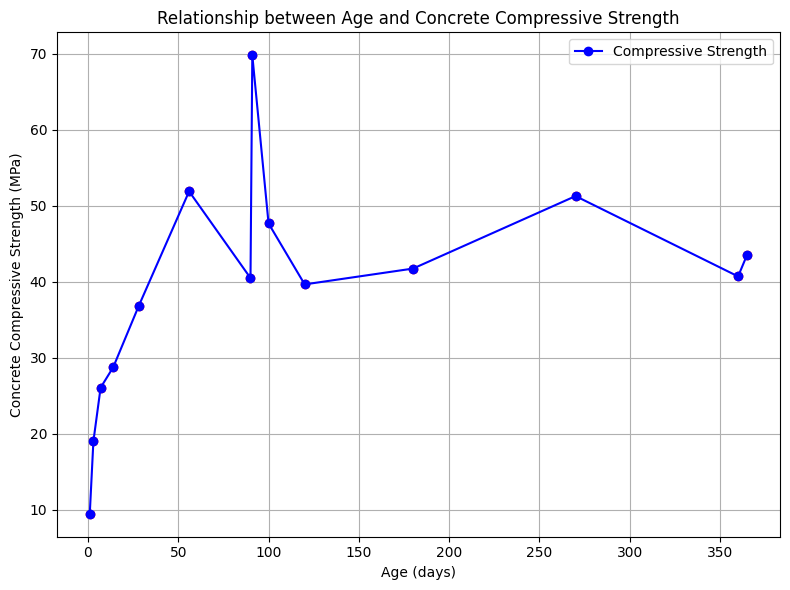

In [258]:
compressive_strength_and_age=pd.pivot_table(data=df,index='Age (day)',values= 'Concrete Compressive Strength')
# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(compressive_strength_and_age.index, compressive_strength_and_age.values, marker='o', linestyle='-', color='b', label='Compressive Strength')

plt.xlabel('Age (days)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Relationship between Age and Concrete Compressive Strength')
plt.grid(True)
plt.legend()

plt.scatter(compressive_strength_and_age.index, compressive_strength_and_age.values, color='red')

# Show plot
plt.tight_layout()
plt.show()

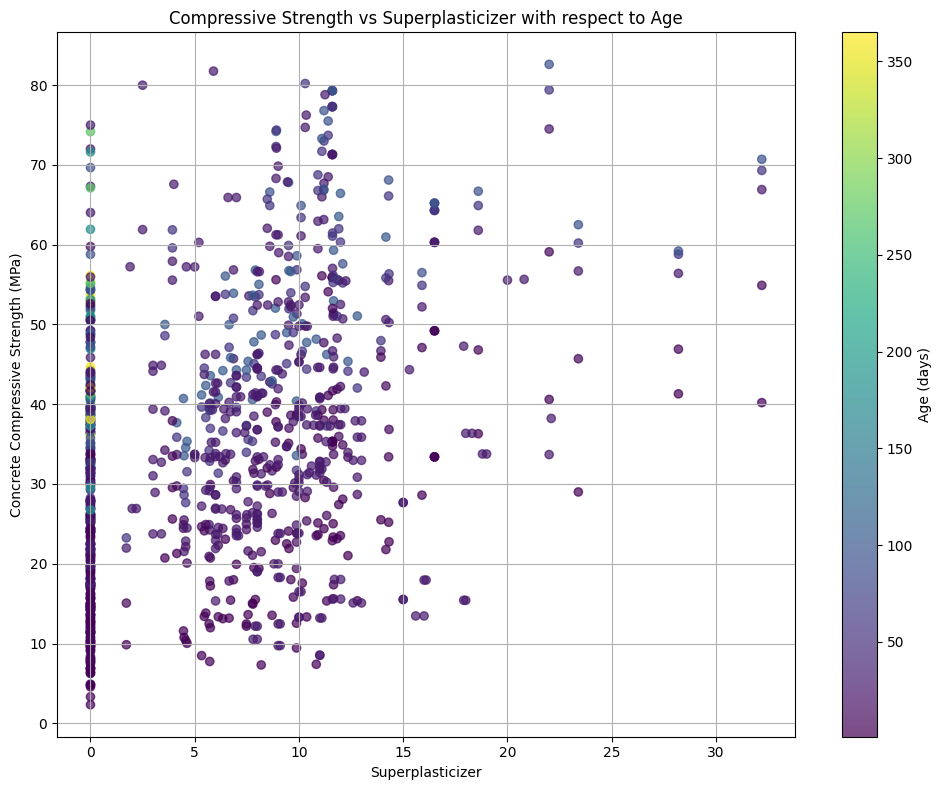

In [259]:
# Relationship between Compressive strength and Superplasticizer with respect to Age
# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Superplasticizer '], df['Concrete Compressive Strength'], c=df['Age (day)'], cmap='viridis', alpha=0.7)

# Add color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Age (days)')

# Add labels and title
plt.xlabel('Superplasticizer')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Compressive Strength vs Superplasticizer with respect to Age')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

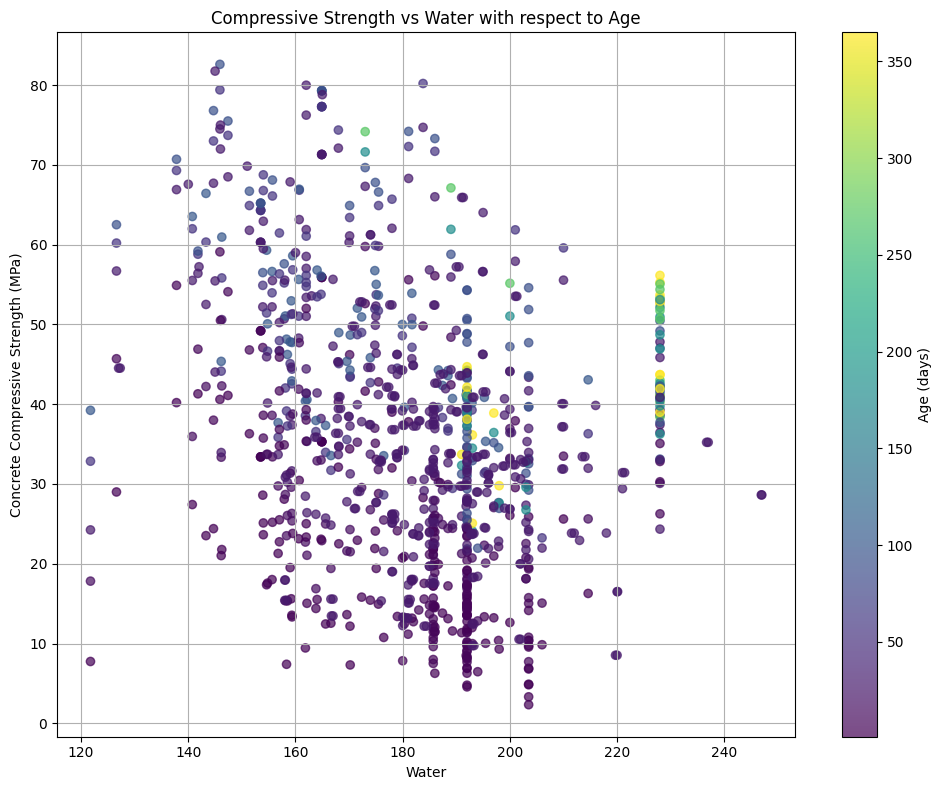

In [260]:
# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Water  '], df['Concrete Compressive Strength'], c=df['Age (day)'], cmap='viridis', alpha=0.7)

# Add color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Age (days)')

# Add labels and title
plt.xlabel('Water')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Compressive Strength vs Water with respect to Age')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Model Creation(data_1)

In [209]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df,target='Concrete Compressive Strength', train_size=0.8, test_size=0.10, valid_size=0.10, random_state=42)
print(X_train.shape)
print(y_train.shape)

(824, 8)
(824,)


In [210]:
filepath = 'Data1'


# Constructing file paths
X_train_path = os.path.join(filepath, 'X_train.csv')
y_train_path = os.path.join(filepath, 'y_train.csv')
X_valid_path = os.path.join(filepath, 'X_valid.csv')
y_valid_path = os.path.join(filepath, 'y_valid.csv')
X_test_path = os.path.join(filepath, 'X_test.csv')
y_test_path = os.path.join(filepath, 'y_test.csv')

# Saving data to constructed paths
X_train.to_csv(X_train_path, index=False)
y_train.to_csv(y_train_path, index=False)
X_valid.to_csv(X_valid_path, index=False)
y_valid.to_csv(y_valid_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_test.to_csv(y_test_path, index=False)


In [211]:
# Read CSV files using constructed paths
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
X_valid = pd.read_csv(X_valid_path)
y_valid = pd.read_csv(y_valid_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# Ensuring y data is 1D array
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(103, 8)
(103,)
(103, 8)
(103,)


In [219]:
# Initialize and train the LGBMRegressor model
light_gbm = lgbm()
light_gbm.fit(X_train, y_train)  

# Predictions for the train set
train_pred = light_gbm.predict(X_train)

print('Prediction for train set')
print('MAE is', mean_absolute_error(y_train, train_pred))
print('MSE is', mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the valid set
valid_pred = light_gbm.predict(X_valid)

print('Prediction for valid set')
print('MAE is', mean_absolute_error(y_valid, valid_pred))
print('MSE is', mean_squared_error(y_valid, valid_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_valid, valid_pred)))
print('R_Sqd is', r2_score(y_valid, valid_pred))
print('Cor is', math.sqrt(r2_score(y_valid, valid_pred)))

print("")

# Predictions for the test set
test_pred = light_gbm.predict(X_test)

print('Prediction for test set')
print('MAE is', mean_absolute_error(y_test, test_pred))
print('MSE is', mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [252]:
# Initialize and train the Random Forest Regressor model
rgbm = rf(max_depth=20, max_features='log2',min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rgbm.fit(X_train, y_train)  

# Predictions for the train set
train_pred = rgbm.predict(X_train)

print('Prediction for train set')
print('MAE is', mean_absolute_error(y_train, train_pred))
print('MSE is', mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the valid set
valid_pred = rgbm.predict(X_valid)

print('Prediction for valid set')
print('MAE is', mean_absolute_error(y_valid, valid_pred))
print('MSE is', mean_squared_error(y_valid, valid_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_valid, valid_pred)))
print('R_Sqd is', r2_score(y_valid, valid_pred))
print('Cor is', math.sqrt(r2_score(y_valid, valid_pred)))

print("")

# Predictions for the test set
test_pred = rgbm.predict(X_test)

print('Prediction for test set')
print('MAE is', mean_absolute_error(y_test, test_pred))
print('MSE is', mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))

Prediction for train set
MAE is 1.3395542898564576
MSE is 4.145593065647264
RMSE is 2.036072951946286
R_Sqd is 0.9854070923709171
Cor is 0.9926767310514119

Prediction for valid set
MAE is 3.4186808499763113
MSE is 25.563704666020552
RMSE is 5.0560562364376995
R_Sqd is 0.8973562742459789
Cor is 0.9472889074859786

Prediction for test set
MAE is 4.069805712010586
MSE is 30.628677969269464
RMSE is 5.534318202748145
R_Sqd is 0.8778323601996483
Cor is 0.9369270837155089


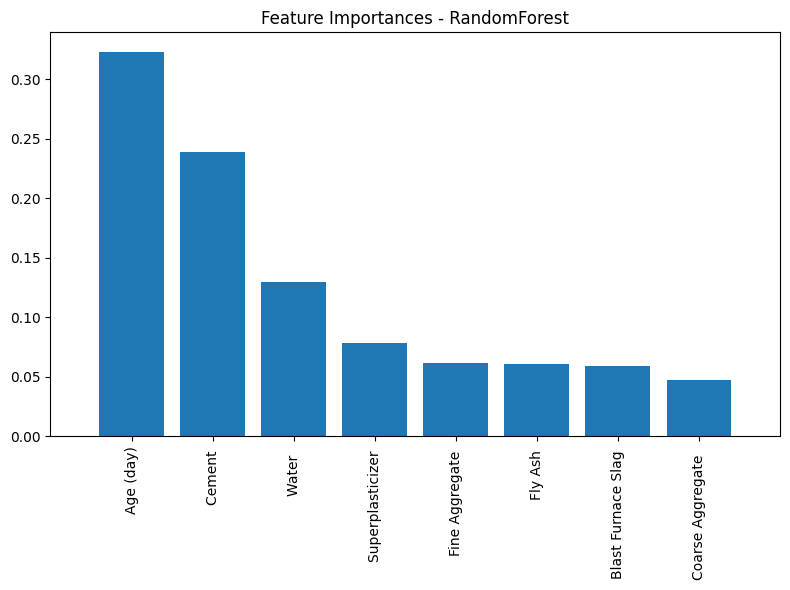

In [249]:
# feature importance 
feature_importances=rgbm.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
feature_names=X_train.columns
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances - RandomForest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [188]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1, 2, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf_regressor = rf(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found by grid search:", best_params)


Best parameters found by grid search: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
